In [1]:
from executer import *
import os
import urllib.parse
import librosa

def load_audio_files(file_path):
    """Loads audio files from the specified directory."""
    audio_data, samplerate = librosa.load(file_path, sr=None)  # Load audio file with original sampling rate
    return audio_data, samplerate


if __name__ == "__main__":
    encoded_str = "../soundClassifier/dataset/d95e05c6-%EA%B8%88%EC%9A%94%EC%9D%BC_%EC%98%A4%ED%9B%84_1-26.m4a"
    decoded_str = urllib.parse.unquote(encoded_str)
    audio_files, sr = load_audio_files(decoded_str) # Load audio files from the dataset directory
    chunk_size = 2 * sr  # Define chunk size as 3 seconds
    hop_size=int(len(audio_files)/100)
    audio_chunks = [audio_files[i:i + chunk_size] for i in range(0, len(audio_files) - chunk_size + 1, hop_size)]  # Split audio_files into chunks with hops
        # Assuming there's a method in the AudioAnalyzer class to handle audio data
    print(len(audio_chunks))
    analyzer = AudioAnalyzer()
    data = []
    for idx, chunck in enumerate(audio_chunks):
        analyzer.audio_waveform = chunck  # Set the audio waveform
        analyzer.samplerate = sr  # Set the samplerate
        ret = analyzer.process_audio()  # Call the process_audio method to handle the audio data
        data.append(ret)
        # output_dir = 'new_dataset'
        # if not os.path.exists(output_dir):
        #     os.makedirs(output_dir)
        # output_file_path = os.path.join(output_dir, f'output_{idx}_{ret["prediction_text"]}.wav')
        # sf.write(output_file_path, ret['audio_waveform'], sr)  # Save the audio waveform to a new file


C:\Users\Hoon\AppData\Local\Temp\ipykernel_20988\2132925265.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, samplerate = librosa.load(file_path, sr=None)  # Load audio file with original sampling rate
c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


97


In [93]:
arr = np.vstack([d['raw_pred'] for d in data])
print(arr.shape)

(97, 15)


c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


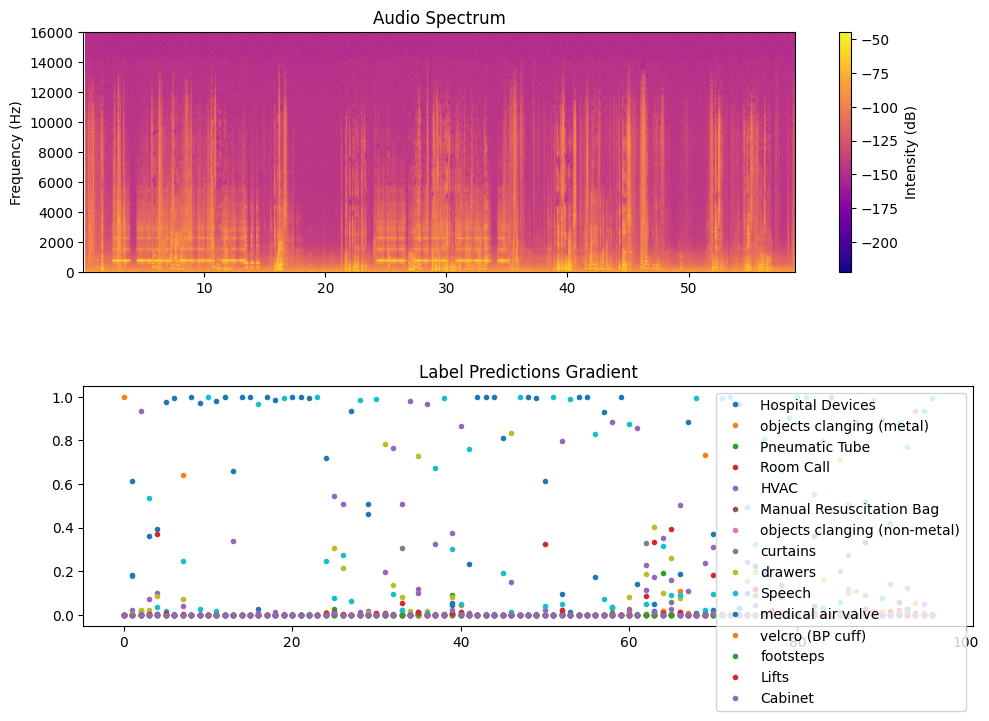

In [3]:

import matplotlib.pyplot as plt

# Plot audio spectrum
plt.figure(figsize=(10, 10))

# Plot the audio spectrum on the top
plt.subplot(3, 1, 1)
plt.title("Audio Spectrum")
plt.specgram(audio_files, NFFT=1024, Fs=sr, Fc=0, noverlap=512, cmap='plasma', sides='default', mode='default')
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')

# Plot the gradient of each output label to ret['prediction_raw'] on the bottom
plt.subplot(3, 1, 2)
plt.title("Label Predictions Gradient")
plt.plot(arr, '.', label=analyzer.labels)    
plt.legend()
plt.tight_layout()
plt.show()



In [94]:
arr = arr.T

In [95]:
arr.shape

(15, 97)

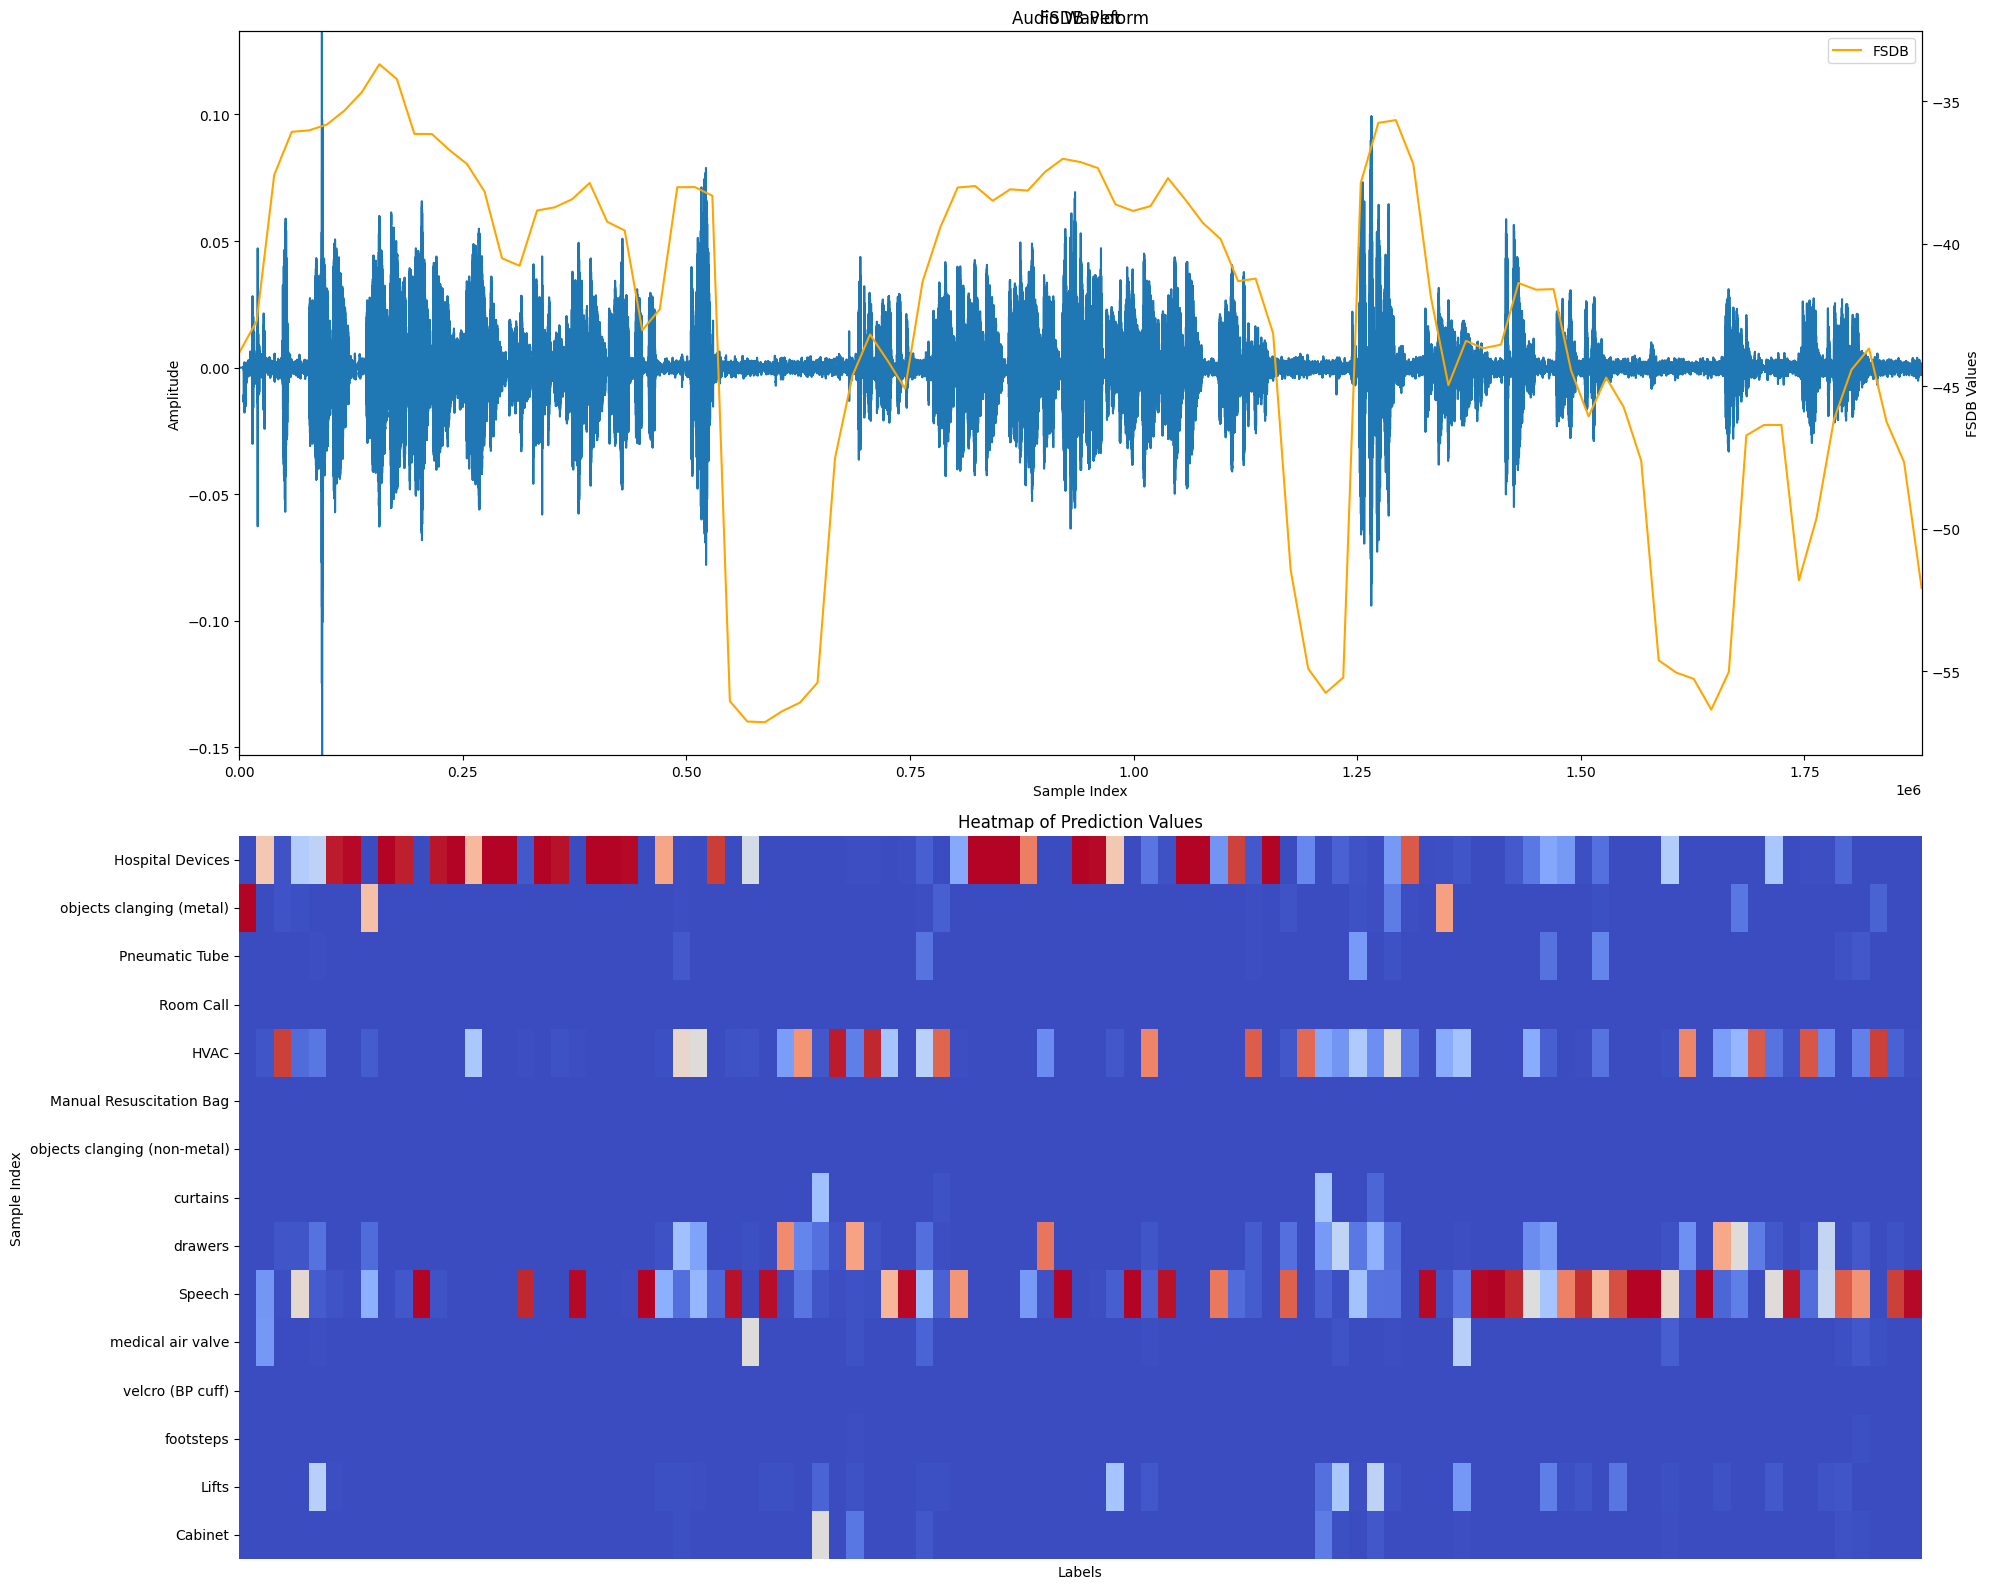

In [96]:
import seaborn as sns
import numpy as np

# Assuming 'arr' contains the prediction values for each label
# Create a heatmap of the prediction values
# ... existing code ...
# Create a new figure for the demo
# Sample data for demonstration
# Create a new figure for the demo
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20, 16))  # Create two subplots

# Plot the audio waveform
ax.set_title("Audio Waveform")
ax.plot(audio_files)  # Plot the audio data
ax.set_xlabel("Sample Index")
ax.set_ylabel("Amplitude")
ax.set_xlim(0, len(audio_files))  # Set x-axis limits to match the length of audio_files
ax.margins(0)  # Remove margins

# Create a heatmap of the prediction values
sns.heatmap(arr, annot=False, fmt=".2f", cmap='coolwarm', yticklabels=analyzer.labels, xticklabels=[], cbar=False, ax=ax2)  # Heatmap on ax2
ax2.set_title("Heatmap of Prediction Values")
ax2.set_xlabel("Labels")
ax2.set_ylabel("Sample Index")

ax3 = ax.twinx()
fsdb = [sample['fsdb'] for sample in data]  # Extract fsdb values from data
ax3.plot(np.linspace(0, len(audio_files), len(fsdb)), fsdb, label='FSDB', color='orange')  # Plot fsdb on ax3
ax3.set_ylabel("FSDB Values")
ax3.set_title("FSDB Plot")
ax3.legend()




# Align x-axes
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
# ... existing code ...


In [30]:
import random 
random_samples = random.sample(data, min(1, len(data)))[0]  # Select random 5 samples from data
audio_waveform = random_samples['audio_waveform']
samplerate = random_samples['samplerate']
print(random_samples['raw_pred'])  # Print the raw prediction values
import IPython.display as ipd  # Import for audio playback
ipd.Audio(audio_waveform, rate=samplerate)  # Create an audio player for the waveform

[5.92503324e-03 4.22584545e-03 1.22083831e-04 7.05421844e-05
 1.58943579e-01 3.00965003e-05 1.14616945e-04 5.97594492e-02
 2.59376973e-01 9.26957652e-02 3.95098235e-04 3.29364411e-04
 6.90126966e-04 3.92332554e-01 2.49889176e-02]


In [120]:
rendering_frame = np.linspace(0, len(sub_audio), round(len(sub_audio)/target_sr * 30), dtype=int)

len(rendering_frame)

1764

  0%|          | 0/1764 [00:00<?, ?it/s]

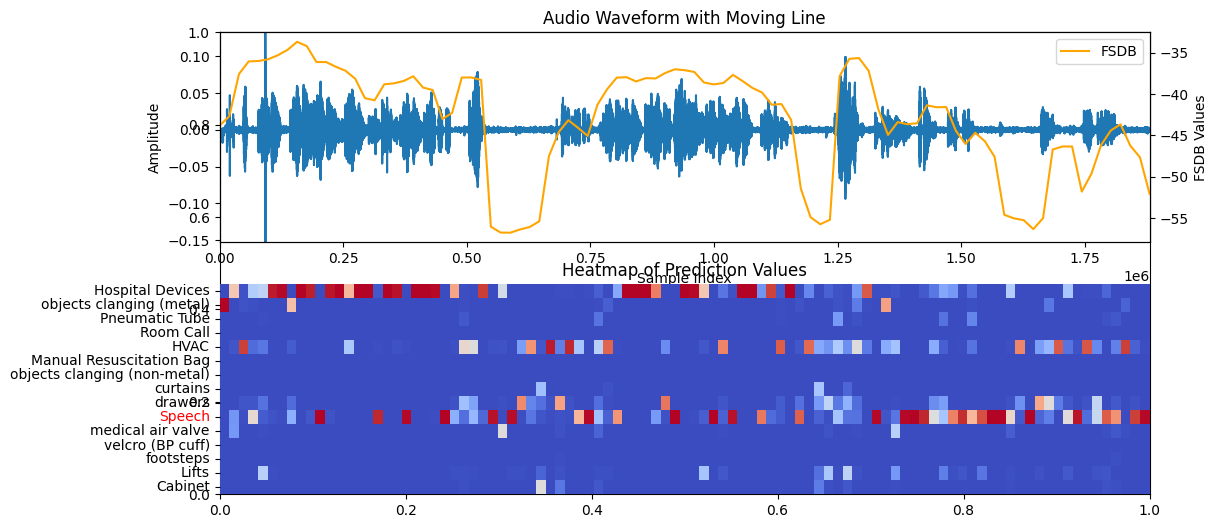

100%|██████████| 1764/1764 [10:21<00:00,  2.84it/s]


<Figure size 640x480 with 0 Axes>

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from tqdm import tqdm
target_sr = 32000
sub_audio = librosa.resample(audio_files, orig_sr=sr, target_sr=target_sr)
chunk_size = 2 * target_sr  # Define chunk size as 3 seconds
hop_size=int(len(sub_audio)/100)

# Create a new figure for the demo
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the audio waveform
ax = fig.add_subplot(211)
ax.plot(sub_audio, label='Audio Waveform')  # Plot the audio data
ax.set_title("Audio Waveform with Moving Line")
ax.set_ylabel("Amplitude")
ax.set_xlim(0, len(sub_audio))  # Set x-axis limits to match the length of audio_files
ax.set_ylim(np.min(sub_audio), np.max(sub_audio))  # Set y-axis limits based on audio data
ax2 = fig.add_subplot(212)
sns.heatmap(arr, annot=False, fmt=".2f", cmap='coolwarm', yticklabels=analyzer.labels, xticklabels=[], cbar=False)  # xticklabels=np.linspace(0, len(audio_files), 95)[]
ax2.set_title("Heatmap of Prediction Values")

ax3 = ax.twinx()
fsdb = [sample['fsdb'] for sample in data]  # Extract fsdb values from data
ax3.plot(np.linspace(0, len(audio_files), len(fsdb)), fsdb, label='FSDB', color='orange')  # Plot fsdb on ax3
ax3.set_ylabel("FSDB Values")
ax3.legend()

a = list(range(0, len(sub_audio) - chunk_size + 1, hop_size))
# Create a vertical line that will move across the waveform
# ... existing code ...

# Create a vertical line that will move across the waveform
line = ax.axvline( color='r', linestyle='--')  # Initial position of the line
# Animation update function
# a = list(np.linspace(0,500,len(data)-2, dtype=int))

rendering_frame = np.linspace(0, len(sub_audio), round(len(sub_audio)/target_sr * 30), dtype=int)

def update(frame):
    if frame not in rendering_frame:
        return line,
    if frame < len(sub_audio):
        idx = round(frame/len(sub_audio)*len(data))
        ax2.get_yticklabels()[np.argmax(data[idx-2]['raw_pred'])].set_color('black')
        ax2.get_yticklabels()[np.argmax(data[idx-1]['raw_pred'])].set_color('red')
        line.set_xdata([frame,])  # Update the x position of the line
    return line, 
# Create the animation
# ... existing code ...

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=rendering_frame, blit=True, interval=33)
x =np.arange(0, len(rendering_frame))

with tqdm(total=len(x)) as pbar:
    for i in range(len(x)):
        ani._draw_frame(i)
        plt.pause(0.001)  # Allow time for tqdm to update
        pbar.update(1)
# Save the animation

with tqdm(total=len(x)) as pbar:
    ani.save('audio_waveform_animation.mp4', writer='ffmpeg', fps=30, progress_callback=lambda i, n: pbar.update(1))  # Save as MP4 file

plt.tight_layout()
plt.show()

In [149]:
import ffmpeg
from IPython.display import Video, Audio
# Define paths for the video and audio files
video_path = 'final.mp4'  # Path to your video file
output_path = 'output_video_with_audio.mp4'  # Path to save the new video
# Video(video_path, embed=True)
Audio(decoded_str, embed=True)

In [160]:
import moviepy.editor as mp

audio = mp.AudioFileClip("output_audio.mp3")
video1 = mp.VideoFileClip(video_path)
final = video1.set_audio(audio)
final.write_videofile("output/output.mp4")


Moviepy - Building video output/output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output/output.mp4



TypeError: must be real number, not NoneType

In [159]:
from pydub import AudioSegment

# Define the input and output file paths
input_file = decoded_str  # Path to your input M4A file
output_file = 'output_audio.mp3'  # Path to save the output MP3 file

# Load the M4A file
audio = AudioSegment.from_file(input_file, format='m4a')

# Export as MP3
audio.export(output_file, format='mp3')

print(f"Converted '{input_file}' to '{output_file}' successfully.")

Converted '../soundClassifier/dataset/d95e05c6-금요일_오후_1-26.m4a' to 'output_audio.mp3' successfully.


In [8]:
import numpy as np
import plotly.graph_objects as go
import librosa
import plotly.io as pio  # Import for saving the figure

# Resample audio files
sub_audio = librosa.resample(audio_files, orig_sr=sr, target_sr=1000)

# Create a figure
fig = go.Figure()

# Add the audio waveform trace
fig.add_trace(go.Scatter(x=np.arange(len(sub_audio)), y=sub_audio, mode='lines', name='Audio Waveform'))

# Create a vertical line trace (initially at x=0)
line = fig.add_trace(go.Scatter(x=[0], y=[0], mode='lines', line=dict(color='red', dash='dash'), name='Moving Line'))

# Update layout
fig.update_layout(
    title="Audio Waveform with Moving Line",
    xaxis_title="Sample Index",
    yaxis_title="Amplitude",
    xaxis=dict(range=[0, len(sub_audio)]),
    yaxis=dict(range=[np.min(sub_audio), np.max(sub_audio)]),
)

# Animation function
frames = []
for i in range(len(sub_audio)):
    frames.append(go.Frame(data=[
        go.Scatter(x=np.arange(len(sub_audio)), y=sub_audio, mode='lines', name='Audio Waveform'),
        go.Scatter(x=[i], y=[sub_audio[i]], mode='lines', line=dict(color='red', dash='dash'), name='Moving Line')
    ]))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {'frame': {'duration': 10, 'redraw': True}, 'mode': 'immediate'}]  # Reduced duration for faster animation
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate'}]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Save the figure as an HTML file
pio.write_html(fig, 'audio_waveform_animation.html')  # Save as HTML file

# Show the figure
fig.show()